Вариант 2
Цель: Контроль пространственных размерностей через свертки и пулинг.

Спроектируйте сеть для выхода (64, 16, 16) за не более 3 слоев свертки.
Условие: Используйте как минимум один слой с padding=0, чтобы часть пространственной информации была потеряна. Можно менять в таких условиях kernel_size и stride.
Эксперимент: Сравните выход с использованием padding=0 и padding=1, оцените разницу в размерности и среднее значение активаций.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

1. Создадим сверточную сеть с тремя слоями, где выход будет (64, 16, 16).

In [2]:
class ConvNetwork(nn.Module):
    def __init__(self, use_padding_zero=False):
        super(ConvNetwork, self).__init__()
        
        if use_padding_zero:
            # Вариант с padding=0 в первом слое
            self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=0)
            self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
            self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        else:
            # Вариант с padding=1 во всех слоях
            self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
            self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x

2. Проведение эксперимента

In [4]:
def analyze_network():
    # Создаем тестовый входной тензор
    input_tensor = torch.randn(3, 16, 16) 
    print(f"Входной тензор: {input_tensor.shape}")
    
    # Тестируем оба варианта
    for use_padding_zero in [True, False]:
        print(f"\n{'='*50}")
        print(f"Тестирование с padding_zero={use_padding_zero}")
        print(f"{'='*50}")
        
        model = ConvNetwork(use_padding_zero=use_padding_zero)
        output = model(input_tensor)
        
        print(f"Выходная размерность: {output.shape}")
        print(f"Среднее значение активаций: {output.mean().item():.6f}")

# Запускаем анализ
analyze_network()

Входной тензор: torch.Size([3, 16, 16])

Тестирование с padding_zero=True
Выходная размерность: torch.Size([64, 14, 14])
Среднее значение активаций: -0.006105

Тестирование с padding_zero=False
Выходная размерность: torch.Size([64, 16, 16])
Среднее значение активаций: 0.007984


Вывод: при padding == 1 размерность [64, 16, 16], padding == 0 размерность [64, 14, 14], т.е. в последнем случае часть пространственной информации была потеряна, что подтверждает формула:
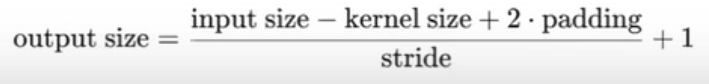
Среднее значение активаций ниже при padding == 0, т.к. теряются граничные признаки